In [68]:
import pandas as pd

df = pd.read_csv("Dataset3.csv")
print(df.head())

  No;Country;Level of development;European Union Membership;Currency;Women Entrepreneurship Index;Entrepreneurship Index;Inflation rate;Female Labor Force Participation Rate
0  4;Austria;Developed;Member;Euro;54.9;64.9;0.9;...                                                                                                                         
1   6;Belgium;Developed;Member;Euro;63.6;65.5;0.6;58                                                                                                                         
2  17;Estonia;Developed;Member;Euro;55.4;60.2;-0....                                                                                                                         
3  18;Finland;Developed;Member;Euro;66.4;65.7;-0....                                                                                                                         
4   19;France;Developed;Member;Euro;68.8;67.3;0;60.6                                                                              

In [69]:
def parser_from_raw_to_df(df):
    columns = df.columns[0].split(";")
    series = df[df.columns[0]].values
    series = pd.Series(series).apply(lambda x : x.split(";"))
    df = pd.DataFrame(columns=columns)
    for index, col in enumerate(df):
        df[col] = series.apply(lambda x : x[index])
    return df
df = parser_from_raw_to_df(df)
print(df.head())

   No  Country Level of development European Union Membership Currency  \
0   4  Austria            Developed                    Member     Euro   
1   6  Belgium            Developed                    Member     Euro   
2  17  Estonia            Developed                    Member     Euro   
3  18  Finland            Developed                    Member     Euro   
4  19   France            Developed                    Member     Euro   

  Women Entrepreneurship Index Entrepreneurship Index Inflation rate  \
0                         54.9                   64.9            0.9   
1                         63.6                   65.5            0.6   
2                         55.4                   60.2          -0.88   
3                         66.4                   65.7           -0.2   
4                         68.8                   67.3              0   

  Female Labor Force Participation Rate  
0                                  67.1  
1                                    5

In [70]:
df = df.drop(["No"], axis = 1)
print(df.head())

   Country Level of development European Union Membership Currency  \
0  Austria            Developed                    Member     Euro   
1  Belgium            Developed                    Member     Euro   
2  Estonia            Developed                    Member     Euro   
3  Finland            Developed                    Member     Euro   
4   France            Developed                    Member     Euro   

  Women Entrepreneurship Index Entrepreneurship Index Inflation rate  \
0                         54.9                   64.9            0.9   
1                         63.6                   65.5            0.6   
2                         55.4                   60.2          -0.88   
3                         66.4                   65.7           -0.2   
4                         68.8                   67.3              0   

  Female Labor Force Participation Rate  
0                                  67.1  
1                                    58  
2                   

In [71]:
# print(df.info())
# print(df.columns)
for col in df:
    try:
        df[col] = df[col].astype("float")
    except:
        print(col)

Country
Level of development
European Union Membership
Currency


In [72]:
def get_obj_to_num(series: pd.Series()):
    uniques = list(series.unique())
    dic = {}
    for index, uni in enumerate(uniques):
        dic[uni] = index
    series = series.apply(lambda x : uniques.index(x))
    return series
    #     print(series)
    
s = pd.Series(["a", "b", "a", "c"])
print(s)
s = get_obj_to_num(s)
print(s)

0    a
1    b
2    a
3    c
dtype: object
0    0
1    1
2    0
3    2
dtype: int64


c:\users\henry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [73]:

cols = ["Country", "Level of development" , "European Union Membership" , "Currency"]

for col in cols:
    df[col] = get_obj_to_num(df[col])
print(df.head())

   Country  Level of development  European Union Membership  Currency  \
0        0                     0                          0         0   
1        1                     0                          0         0   
2        2                     0                          0         0   
3        3                     0                          0         0   
4        4                     0                          0         0   

   Women Entrepreneurship Index  Entrepreneurship Index  Inflation rate  \
0                          54.9                    64.9            0.90   
1                          63.6                    65.5            0.60   
2                          55.4                    60.2           -0.88   
3                          66.4                    65.7           -0.20   
4                          68.8                    67.3            0.00   

   Female Labor Force Participation Rate  
0                                   67.1  
1                       

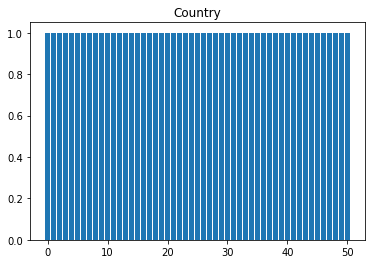

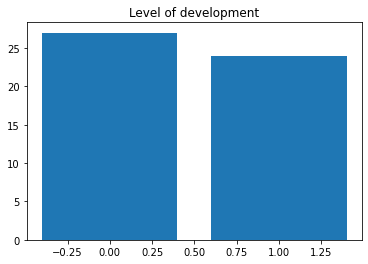

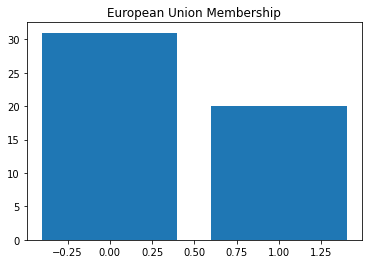

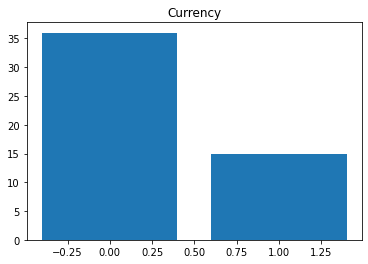

In [74]:
from matplotlib import pyplot as plt
# print()

for col in cols:
    plt.title(col)
    plt.bar(df[col].unique(), height = df[col].value_counts())
    plt.show()
#     plt.bar()

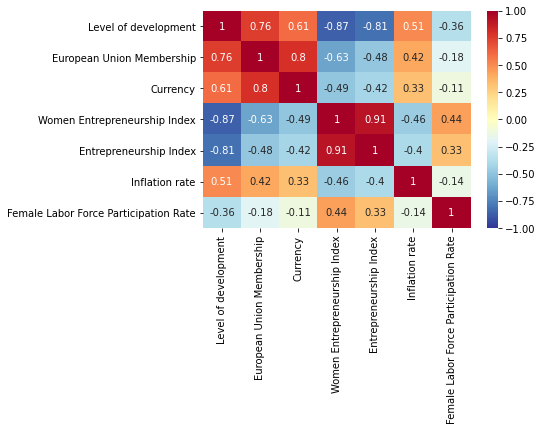

In [75]:
import seaborn as sns
n_df = df.drop(["Country"], axis = 1)
heatmap = sns.heatmap(n_df.corr(), cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
plt.show()

(51, 4) (51, 2)


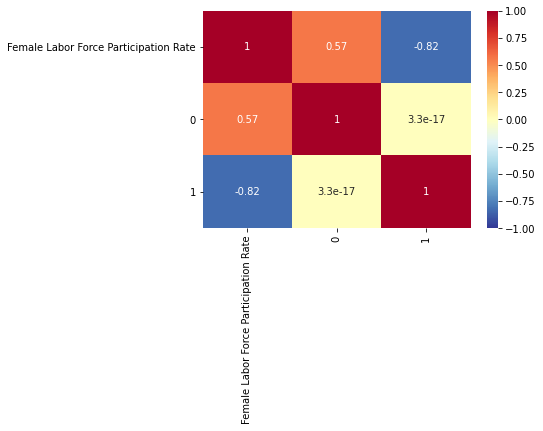

In [97]:
rate = n_df["Female Labor Force Participation Rate"]
feature = df.drop(cols, axis = 1)
# feature = df
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_feature = pca.fit_transform(feature)
print(feature.shape, pca_feature.shape)
pca_heatmap = pd.concat([rate, pd.DataFrame(pca_feature)], axis = 1)
heatmap = sns.heatmap(pca_heatmap.corr(), cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
# plt.show()

In [99]:
feature = pd.concat([pd.DataFrame(pca_feature), df[cols]], axis = 1)
print(feature.head())

           0         1  Country  Level of development  \
0  19.830911 -0.920274        0                     0   
1  22.454083  8.981872        1                     0   
2  17.571235 -3.639981        2                     0   
3  27.845282  0.487090        3                     0   
4  27.908136  7.949481        4                     0   

   European Union Membership  Currency  
0                          0         0  
1                          0         0  
2                          0         0  
3                          0         0  
4                          0         0  


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, rate, test_size=0.3, random_state=0)


In [166]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam

adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto')



model = Sequential()
model.add(Dense(256, input_dim=6,kernel_regularizer=regularizers.l2(0.1)))
model.add(Activation('relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.1)))
model.add(Activation('relu'))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.1)))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer="adam", metrics=[])



model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=2000, batch_size=5, verbose=2, callbacks = []) 
y_pred = model.predict(X_test)

Train on 28 samples, validate on 7 samples
Epoch 1/2000
 - 0s - loss: 3244.7421 - val_loss: 2546.7174
Epoch 2/2000
 - 0s - loss: 2397.7037 - val_loss: 1721.9799
Epoch 3/2000
 - 0s - loss: 1436.1029 - val_loss: 1062.2637
Epoch 4/2000
 - 0s - loss: 731.6581 - val_loss: 928.6189
Epoch 5/2000
 - 0s - loss: 661.2775 - val_loss: 752.3671
Epoch 6/2000
 - 0s - loss: 551.8844 - val_loss: 396.6303
Epoch 7/2000
 - 0s - loss: 458.1979 - val_loss: 341.1965
Epoch 8/2000
 - 0s - loss: 460.7226 - val_loss: 325.6269
Epoch 9/2000
 - 0s - loss: 442.7592 - val_loss: 345.9755
Epoch 10/2000
 - 0s - loss: 410.9698 - val_loss: 371.3844
Epoch 11/2000
 - 0s - loss: 401.4918 - val_loss: 398.6242
Epoch 12/2000
 - 0s - loss: 396.7838 - val_loss: 412.2287
Epoch 13/2000
 - 0s - loss: 390.2071 - val_loss: 412.4736
Epoch 14/2000
 - 0s - loss: 381.2620 - val_loss: 380.9962
Epoch 15/2000
 - 0s - loss: 368.7297 - val_loss: 376.1559
Epoch 16/2000
 - 0s - loss: 359.1292 - val_loss: 352.2546
Epoch 17/2000
 - 0s - loss: 348.

Epoch 143/2000
 - 0s - loss: 23.5404 - val_loss: 93.7497
Epoch 144/2000
 - 0s - loss: 23.2150 - val_loss: 83.3773
Epoch 145/2000
 - 0s - loss: 24.0080 - val_loss: 95.7516
Epoch 146/2000
 - 0s - loss: 23.5237 - val_loss: 84.5596
Epoch 147/2000
 - 0s - loss: 23.3954 - val_loss: 88.0246
Epoch 148/2000
 - 0s - loss: 23.4722 - val_loss: 81.1430
Epoch 149/2000
 - 0s - loss: 22.8450 - val_loss: 85.5104
Epoch 150/2000
 - 0s - loss: 22.2962 - val_loss: 81.7257
Epoch 151/2000
 - 0s - loss: 22.0360 - val_loss: 84.1827
Epoch 152/2000
 - 0s - loss: 22.3880 - val_loss: 79.3757
Epoch 153/2000
 - 0s - loss: 22.0789 - val_loss: 89.1796
Epoch 154/2000
 - 0s - loss: 22.6748 - val_loss: 74.9448
Epoch 155/2000
 - 0s - loss: 23.3783 - val_loss: 77.0494
Epoch 156/2000
 - 0s - loss: 22.6333 - val_loss: 83.4526
Epoch 157/2000
 - 0s - loss: 23.0823 - val_loss: 79.5126
Epoch 158/2000
 - 0s - loss: 23.8100 - val_loss: 81.1680
Epoch 159/2000
 - 0s - loss: 22.7359 - val_loss: 78.2455
Epoch 160/2000
 - 0s - loss: 22

Epoch 287/2000
 - 0s - loss: 18.8700 - val_loss: 62.5148
Epoch 288/2000
 - 0s - loss: 17.2073 - val_loss: 68.9397
Epoch 289/2000
 - 0s - loss: 16.0257 - val_loss: 61.9793
Epoch 290/2000
 - 0s - loss: 15.9542 - val_loss: 68.0196
Epoch 291/2000
 - 0s - loss: 15.9429 - val_loss: 61.6283
Epoch 292/2000
 - 0s - loss: 15.0610 - val_loss: 68.3325
Epoch 293/2000
 - 0s - loss: 15.3169 - val_loss: 66.5823
Epoch 294/2000
 - 0s - loss: 16.0608 - val_loss: 66.1152
Epoch 295/2000
 - 0s - loss: 16.0159 - val_loss: 70.0243
Epoch 296/2000
 - 0s - loss: 17.3927 - val_loss: 66.1952
Epoch 297/2000
 - 0s - loss: 15.9763 - val_loss: 59.8678
Epoch 298/2000
 - 0s - loss: 15.7022 - val_loss: 72.8017
Epoch 299/2000
 - 0s - loss: 15.8683 - val_loss: 60.2643
Epoch 300/2000
 - 0s - loss: 15.7027 - val_loss: 67.2077
Epoch 301/2000
 - 0s - loss: 15.8691 - val_loss: 66.2316
Epoch 302/2000
 - 0s - loss: 16.6487 - val_loss: 61.7491
Epoch 303/2000
 - 0s - loss: 16.3251 - val_loss: 70.8964
Epoch 304/2000
 - 0s - loss: 16

Epoch 431/2000
 - 0s - loss: 11.8913 - val_loss: 57.1249
Epoch 432/2000
 - 0s - loss: 11.9762 - val_loss: 58.0214
Epoch 433/2000
 - 0s - loss: 11.9961 - val_loss: 57.8684
Epoch 434/2000
 - 0s - loss: 11.8080 - val_loss: 57.7305
Epoch 435/2000
 - 0s - loss: 11.8392 - val_loss: 56.6542
Epoch 436/2000
 - 0s - loss: 11.9958 - val_loss: 57.4666
Epoch 437/2000
 - 0s - loss: 11.8551 - val_loss: 55.9706
Epoch 438/2000
 - 0s - loss: 11.9171 - val_loss: 59.7416
Epoch 439/2000
 - 0s - loss: 11.8614 - val_loss: 52.2489
Epoch 440/2000
 - 0s - loss: 11.8510 - val_loss: 60.9908
Epoch 441/2000
 - 0s - loss: 12.2751 - val_loss: 54.5357
Epoch 442/2000
 - 0s - loss: 12.6430 - val_loss: 56.5966
Epoch 443/2000
 - 0s - loss: 11.9894 - val_loss: 58.4221
Epoch 444/2000
 - 0s - loss: 11.9259 - val_loss: 53.3152
Epoch 445/2000
 - 0s - loss: 12.3295 - val_loss: 59.0116
Epoch 446/2000
 - 0s - loss: 11.9339 - val_loss: 54.1044
Epoch 447/2000
 - 0s - loss: 11.6710 - val_loss: 56.1870
Epoch 448/2000
 - 0s - loss: 11

Epoch 576/2000
 - 0s - loss: 9.0215 - val_loss: 38.8664
Epoch 577/2000
 - 0s - loss: 8.8958 - val_loss: 44.3343
Epoch 578/2000
 - 0s - loss: 9.0107 - val_loss: 42.8922
Epoch 579/2000
 - 0s - loss: 8.9075 - val_loss: 43.0918
Epoch 580/2000
 - 0s - loss: 8.9756 - val_loss: 44.0691
Epoch 581/2000
 - 0s - loss: 9.1816 - val_loss: 43.9719
Epoch 582/2000
 - 0s - loss: 9.6745 - val_loss: 44.7775
Epoch 583/2000
 - 0s - loss: 10.4367 - val_loss: 39.6209
Epoch 584/2000
 - 0s - loss: 11.6035 - val_loss: 55.3472
Epoch 585/2000
 - 0s - loss: 11.3780 - val_loss: 34.9107
Epoch 586/2000
 - 0s - loss: 10.8540 - val_loss: 50.7995
Epoch 587/2000
 - 0s - loss: 10.0425 - val_loss: 45.1992
Epoch 588/2000
 - 0s - loss: 10.4734 - val_loss: 53.8833
Epoch 589/2000
 - 0s - loss: 12.8907 - val_loss: 36.4670
Epoch 590/2000
 - 0s - loss: 12.8436 - val_loss: 61.8842
Epoch 591/2000
 - 0s - loss: 13.8119 - val_loss: 27.2802
Epoch 592/2000
 - 0s - loss: 16.1923 - val_loss: 55.8741
Epoch 593/2000
 - 0s - loss: 13.3646 -

Epoch 722/2000
 - 0s - loss: 7.3887 - val_loss: 33.9425
Epoch 723/2000
 - 0s - loss: 7.5064 - val_loss: 34.2569
Epoch 724/2000
 - 0s - loss: 7.3900 - val_loss: 37.3469
Epoch 725/2000
 - 0s - loss: 7.2754 - val_loss: 32.7310
Epoch 726/2000
 - 0s - loss: 7.2141 - val_loss: 35.4119
Epoch 727/2000
 - 0s - loss: 7.4245 - val_loss: 33.2147
Epoch 728/2000
 - 0s - loss: 7.2580 - val_loss: 34.1883
Epoch 729/2000
 - 0s - loss: 7.1129 - val_loss: 31.8295
Epoch 730/2000
 - 0s - loss: 7.0433 - val_loss: 33.8356
Epoch 731/2000
 - 0s - loss: 7.0755 - val_loss: 31.5323
Epoch 732/2000
 - 0s - loss: 7.1837 - val_loss: 35.0341
Epoch 733/2000
 - 0s - loss: 7.2846 - val_loss: 31.0634
Epoch 734/2000
 - 0s - loss: 7.2018 - val_loss: 32.8052
Epoch 735/2000
 - 0s - loss: 7.0376 - val_loss: 31.8256
Epoch 736/2000
 - 0s - loss: 7.1535 - val_loss: 30.9444
Epoch 737/2000
 - 0s - loss: 7.0853 - val_loss: 34.1617
Epoch 738/2000
 - 0s - loss: 7.0101 - val_loss: 31.7008
Epoch 739/2000
 - 0s - loss: 7.0126 - val_loss: 

Epoch 869/2000
 - 0s - loss: 5.8246 - val_loss: 28.0515
Epoch 870/2000
 - 0s - loss: 5.8716 - val_loss: 31.8946
Epoch 871/2000
 - 0s - loss: 5.8899 - val_loss: 27.1297
Epoch 872/2000
 - 0s - loss: 5.7828 - val_loss: 29.9329
Epoch 873/2000
 - 0s - loss: 5.9196 - val_loss: 27.6961
Epoch 874/2000
 - 0s - loss: 5.7736 - val_loss: 29.9494
Epoch 875/2000
 - 0s - loss: 5.8028 - val_loss: 27.8463
Epoch 876/2000
 - 0s - loss: 5.8094 - val_loss: 31.2847
Epoch 877/2000
 - 0s - loss: 5.7127 - val_loss: 28.9407
Epoch 878/2000
 - 0s - loss: 5.8745 - val_loss: 27.1530
Epoch 879/2000
 - 0s - loss: 5.7712 - val_loss: 26.9957
Epoch 880/2000
 - 0s - loss: 5.6819 - val_loss: 29.3633
Epoch 881/2000
 - 0s - loss: 5.5903 - val_loss: 29.3479
Epoch 882/2000
 - 0s - loss: 5.7402 - val_loss: 27.9724
Epoch 883/2000
 - 0s - loss: 5.6336 - val_loss: 29.8049
Epoch 884/2000
 - 0s - loss: 5.5886 - val_loss: 27.9185
Epoch 885/2000
 - 0s - loss: 5.5753 - val_loss: 27.6747
Epoch 886/2000
 - 0s - loss: 5.5975 - val_loss: 

Epoch 1015/2000
 - 0s - loss: 4.6447 - val_loss: 21.0802
Epoch 1016/2000
 - 0s - loss: 4.5878 - val_loss: 20.9154
Epoch 1017/2000
 - 0s - loss: 4.5671 - val_loss: 20.9813
Epoch 1018/2000
 - 0s - loss: 4.6021 - val_loss: 21.5278
Epoch 1019/2000
 - 0s - loss: 4.6848 - val_loss: 19.4820
Epoch 1020/2000
 - 0s - loss: 4.6987 - val_loss: 22.3225
Epoch 1021/2000
 - 0s - loss: 4.5666 - val_loss: 20.7960
Epoch 1022/2000
 - 0s - loss: 4.5553 - val_loss: 21.9179
Epoch 1023/2000
 - 0s - loss: 4.6305 - val_loss: 20.1480
Epoch 1024/2000
 - 0s - loss: 4.5109 - val_loss: 19.8797
Epoch 1025/2000
 - 0s - loss: 4.5145 - val_loss: 20.6736
Epoch 1026/2000
 - 0s - loss: 4.5396 - val_loss: 19.5561
Epoch 1027/2000
 - 0s - loss: 4.5045 - val_loss: 19.7221
Epoch 1028/2000
 - 0s - loss: 4.5338 - val_loss: 20.6440
Epoch 1029/2000
 - 0s - loss: 4.7834 - val_loss: 21.6024
Epoch 1030/2000
 - 0s - loss: 5.0551 - val_loss: 18.8357
Epoch 1031/2000
 - 0s - loss: 4.7542 - val_loss: 20.6977
Epoch 1032/2000
 - 0s - loss: 4

Epoch 1159/2000
 - 0s - loss: 3.7861 - val_loss: 17.1437
Epoch 1160/2000
 - 0s - loss: 3.8251 - val_loss: 16.9338
Epoch 1161/2000
 - 0s - loss: 3.7574 - val_loss: 16.6037
Epoch 1162/2000
 - 0s - loss: 3.7500 - val_loss: 16.7405
Epoch 1163/2000
 - 0s - loss: 3.7426 - val_loss: 16.5502
Epoch 1164/2000
 - 0s - loss: 3.7480 - val_loss: 16.9143
Epoch 1165/2000
 - 0s - loss: 3.7540 - val_loss: 16.4714
Epoch 1166/2000
 - 0s - loss: 3.7335 - val_loss: 16.8043
Epoch 1167/2000
 - 0s - loss: 3.7305 - val_loss: 16.4802
Epoch 1168/2000
 - 0s - loss: 3.7409 - val_loss: 16.8734
Epoch 1169/2000
 - 0s - loss: 3.7104 - val_loss: 16.4153
Epoch 1170/2000
 - 0s - loss: 3.7113 - val_loss: 16.2210
Epoch 1171/2000
 - 0s - loss: 3.7036 - val_loss: 16.4742
Epoch 1172/2000
 - 0s - loss: 3.6834 - val_loss: 16.5448
Epoch 1173/2000
 - 0s - loss: 3.6770 - val_loss: 16.4062
Epoch 1174/2000
 - 0s - loss: 3.7008 - val_loss: 15.4028
Epoch 1175/2000
 - 0s - loss: 3.7090 - val_loss: 17.1433
Epoch 1176/2000
 - 0s - loss: 3

Epoch 1303/2000
 - 0s - loss: 3.9787 - val_loss: 22.2424
Epoch 1304/2000
 - 0s - loss: 3.9981 - val_loss: 23.9139
Epoch 1305/2000
 - 0s - loss: 3.6928 - val_loss: 20.8085
Epoch 1306/2000
 - 0s - loss: 3.5124 - val_loss: 19.9602
Epoch 1307/2000
 - 0s - loss: 3.3867 - val_loss: 20.2006
Epoch 1308/2000
 - 0s - loss: 3.3322 - val_loss: 19.4231
Epoch 1309/2000
 - 0s - loss: 3.3213 - val_loss: 19.8664
Epoch 1310/2000
 - 0s - loss: 3.2939 - val_loss: 19.6099
Epoch 1311/2000
 - 0s - loss: 3.2586 - val_loss: 19.1577
Epoch 1312/2000
 - 0s - loss: 3.2445 - val_loss: 18.4858
Epoch 1313/2000
 - 0s - loss: 3.2199 - val_loss: 18.7460
Epoch 1314/2000
 - 0s - loss: 3.2126 - val_loss: 18.2559
Epoch 1315/2000
 - 0s - loss: 3.2668 - val_loss: 18.8646
Epoch 1316/2000
 - 0s - loss: 3.1957 - val_loss: 17.8636
Epoch 1317/2000
 - 0s - loss: 3.1853 - val_loss: 18.0123
Epoch 1318/2000
 - 0s - loss: 3.2257 - val_loss: 19.1292
Epoch 1319/2000
 - 0s - loss: 3.2010 - val_loss: 16.6270
Epoch 1320/2000
 - 0s - loss: 3

Epoch 1447/2000
 - 0s - loss: 2.8591 - val_loss: 15.1501
Epoch 1448/2000
 - 0s - loss: 2.8468 - val_loss: 14.5688
Epoch 1449/2000
 - 0s - loss: 2.8312 - val_loss: 14.4210
Epoch 1450/2000
 - 0s - loss: 2.8203 - val_loss: 13.9428
Epoch 1451/2000
 - 0s - loss: 2.8377 - val_loss: 14.3550
Epoch 1452/2000
 - 0s - loss: 2.8821 - val_loss: 14.6136
Epoch 1453/2000
 - 0s - loss: 2.8652 - val_loss: 13.1302
Epoch 1454/2000
 - 0s - loss: 2.8868 - val_loss: 13.9320
Epoch 1455/2000
 - 0s - loss: 2.8707 - val_loss: 13.7260
Epoch 1456/2000
 - 0s - loss: 2.8308 - val_loss: 12.8542
Epoch 1457/2000
 - 0s - loss: 2.8469 - val_loss: 13.6788
Epoch 1458/2000
 - 0s - loss: 2.9216 - val_loss: 12.7624
Epoch 1459/2000
 - 0s - loss: 2.8270 - val_loss: 13.1907
Epoch 1460/2000
 - 0s - loss: 2.7891 - val_loss: 12.6428
Epoch 1461/2000
 - 0s - loss: 2.7846 - val_loss: 12.6233
Epoch 1462/2000
 - 0s - loss: 2.7682 - val_loss: 12.8169
Epoch 1463/2000
 - 0s - loss: 2.7479 - val_loss: 12.2481
Epoch 1464/2000
 - 0s - loss: 2

Epoch 1591/2000
 - 0s - loss: 2.8046 - val_loss: 14.8753
Epoch 1592/2000
 - 0s - loss: 2.5506 - val_loss: 15.0596
Epoch 1593/2000
 - 0s - loss: 2.5029 - val_loss: 14.9268
Epoch 1594/2000
 - 0s - loss: 2.5774 - val_loss: 14.3963
Epoch 1595/2000
 - 0s - loss: 2.5153 - val_loss: 14.7876
Epoch 1596/2000
 - 0s - loss: 2.5284 - val_loss: 13.1369
Epoch 1597/2000
 - 0s - loss: 2.4831 - val_loss: 14.2261
Epoch 1598/2000
 - 0s - loss: 2.4308 - val_loss: 13.2063
Epoch 1599/2000
 - 0s - loss: 2.4465 - val_loss: 13.6790
Epoch 1600/2000
 - 0s - loss: 2.4291 - val_loss: 12.4645
Epoch 1601/2000
 - 0s - loss: 2.4747 - val_loss: 13.3798
Epoch 1602/2000
 - 0s - loss: 2.4681 - val_loss: 13.2597
Epoch 1603/2000
 - 0s - loss: 2.4394 - val_loss: 12.1645
Epoch 1604/2000
 - 0s - loss: 2.4762 - val_loss: 13.1312
Epoch 1605/2000
 - 0s - loss: 2.4426 - val_loss: 13.0437
Epoch 1606/2000
 - 0s - loss: 2.4308 - val_loss: 12.0627
Epoch 1607/2000
 - 0s - loss: 2.4190 - val_loss: 12.2646
Epoch 1608/2000
 - 0s - loss: 2

Epoch 1736/2000
 - 0s - loss: 2.2774 - val_loss: 10.6189
Epoch 1737/2000
 - 0s - loss: 2.5659 - val_loss: 11.1017
Epoch 1738/2000
 - 0s - loss: 3.0500 - val_loss: 7.3784
Epoch 1739/2000
 - 0s - loss: 2.9959 - val_loss: 13.9011
Epoch 1740/2000
 - 0s - loss: 2.8488 - val_loss: 12.7202
Epoch 1741/2000
 - 0s - loss: 2.5061 - val_loss: 12.1664
Epoch 1742/2000
 - 0s - loss: 2.4511 - val_loss: 11.5094
Epoch 1743/2000
 - 0s - loss: 2.2725 - val_loss: 12.6042
Epoch 1744/2000
 - 0s - loss: 2.3758 - val_loss: 11.6279
Epoch 1745/2000
 - 0s - loss: 2.7567 - val_loss: 11.0740
Epoch 1746/2000
 - 0s - loss: 2.3903 - val_loss: 12.1796
Epoch 1747/2000
 - 0s - loss: 2.2808 - val_loss: 10.1216
Epoch 1748/2000
 - 0s - loss: 2.4269 - val_loss: 11.6624
Epoch 1749/2000
 - 0s - loss: 2.3408 - val_loss: 14.5460
Epoch 1750/2000
 - 0s - loss: 2.4239 - val_loss: 10.3710
Epoch 1751/2000
 - 0s - loss: 2.7361 - val_loss: 10.6015
Epoch 1752/2000
 - 0s - loss: 2.5554 - val_loss: 12.1639
Epoch 1753/2000
 - 0s - loss: 2.

Epoch 1881/2000
 - 0s - loss: 2.5822 - val_loss: 8.6869
Epoch 1882/2000
 - 0s - loss: 2.2820 - val_loss: 7.9516
Epoch 1883/2000
 - 0s - loss: 2.1709 - val_loss: 10.0921
Epoch 1884/2000
 - 0s - loss: 2.1161 - val_loss: 11.1865
Epoch 1885/2000
 - 0s - loss: 2.2228 - val_loss: 8.9215
Epoch 1886/2000
 - 0s - loss: 2.0016 - val_loss: 8.7794
Epoch 1887/2000
 - 0s - loss: 1.9561 - val_loss: 9.8046
Epoch 1888/2000
 - 0s - loss: 1.8520 - val_loss: 10.0151
Epoch 1889/2000
 - 0s - loss: 1.8280 - val_loss: 8.4169
Epoch 1890/2000
 - 0s - loss: 1.8741 - val_loss: 9.0080
Epoch 1891/2000
 - 0s - loss: 1.8311 - val_loss: 9.9250
Epoch 1892/2000
 - 0s - loss: 1.8435 - val_loss: 8.5561
Epoch 1893/2000
 - 0s - loss: 1.7957 - val_loss: 9.1064
Epoch 1894/2000
 - 0s - loss: 1.7897 - val_loss: 9.1960
Epoch 1895/2000
 - 0s - loss: 1.7779 - val_loss: 9.1955
Epoch 1896/2000
 - 0s - loss: 1.7622 - val_loss: 8.6880
Epoch 1897/2000
 - 0s - loss: 1.7774 - val_loss: 8.6980
Epoch 1898/2000
 - 0s - loss: 1.7767 - val_lo

In [167]:

print(y_test[:10], y_pred[:10])

29    69.4
11    69.2
10    66.5
22    64.7
2     68.5
28    47.3
45    65.2
32    62.4
26    55.0
4     60.6
Name: Female Labor Force Participation Rate, dtype: float64 [[62.441544]
 [69.6504  ]
 [62.852608]
 [61.086296]
 [63.790306]
 [44.986557]
 [66.143456]
 [56.6286  ]
 [55.078346]
 [62.604958]]
